In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
pd.options.display.max_columns=1000
pd.options.display.width=160
mlp.rcParams["figure.dpi"] = 200
mlp.rcParams["figure.facecolor"] = "white"

In [3]:
its = pd.read_csv("../../../../Outcome Measurement Data/HIV/SIGPRO/sigpro_f4_JanNov2018 - ITS.csv")
vinculacion = pd.read_csv("../../../../Outcome Measurement Data/HIV/SIGPRO/sigpro_f4_JanNov2018 - Vinculacion.csv")

In [4]:
pb_tvc = pd.read_csv("../../../../Outcome Measurement Data/HIV/SIGPRO/sigpro_f4_JanNov2018 - PB_TVC.csv")

In [5]:
ejecutores = {
    "NAC0401": "CAS",
    "NAC0402": "OTRANS",
    "NAC0403": "FUNDACION MARCO ANTONIO", 
    "NAC0404": "ASOCIACION IDEI",
    "NAC0405": "FUNDACION FERNANCO ITURBIDE",
    "NAC0101": "HIVOS"
}


In [7]:
pb_tvc["Ejecutores"] = pb_tvc.codejecutor.replace(ejecutores)
# its["Ejecutores"] = its.codejecutor.replace(ejecutores)
pb_tvc["Mes"] = pb_tvc.fechareal.apply(lambda x: str(x)[0:7])
pb_tvc["Mes2"] = pb_tvc.codanno * 12 + pb_tvc.codmes
pb_tvc.columns

Index(['Unnamed: 0', 'numeroInforme', 'codigoActividad', 'codigounico',
       'codgrupo', 'codsubgrupo', 'refervih', 'prePruebaVIH', 'pruebaVIH',
       'postPruebaVIH', 'conoceResultadoVIH', 'codResultadoVIH',
       'conoceResultadoSif', 'codResultadoSif', 'condonesMasculinos',
       'condonesFemeninos', 'condonesSabores', 'lubriSachet', 'lubriTubo',
       'impresos', 'grupo', 'subgrupo', 'resultadoVIH', 'codejecutor',
       'codanno', 'codmes', 'codigoTipoActividad', 'tipoActividad',
       'resultadoSif', 'codDepMun', 'lugar', 'direccion', 'responsable',
       'educador', 'unmovil', 'fechareal', 'departamento', 'municipio', 'tema',
       'pqBasico', 'Date', 'Gender', 'Age', 'municode', 'Ejecutores', 'Mes',
       'Mes2'],
      dtype='object')

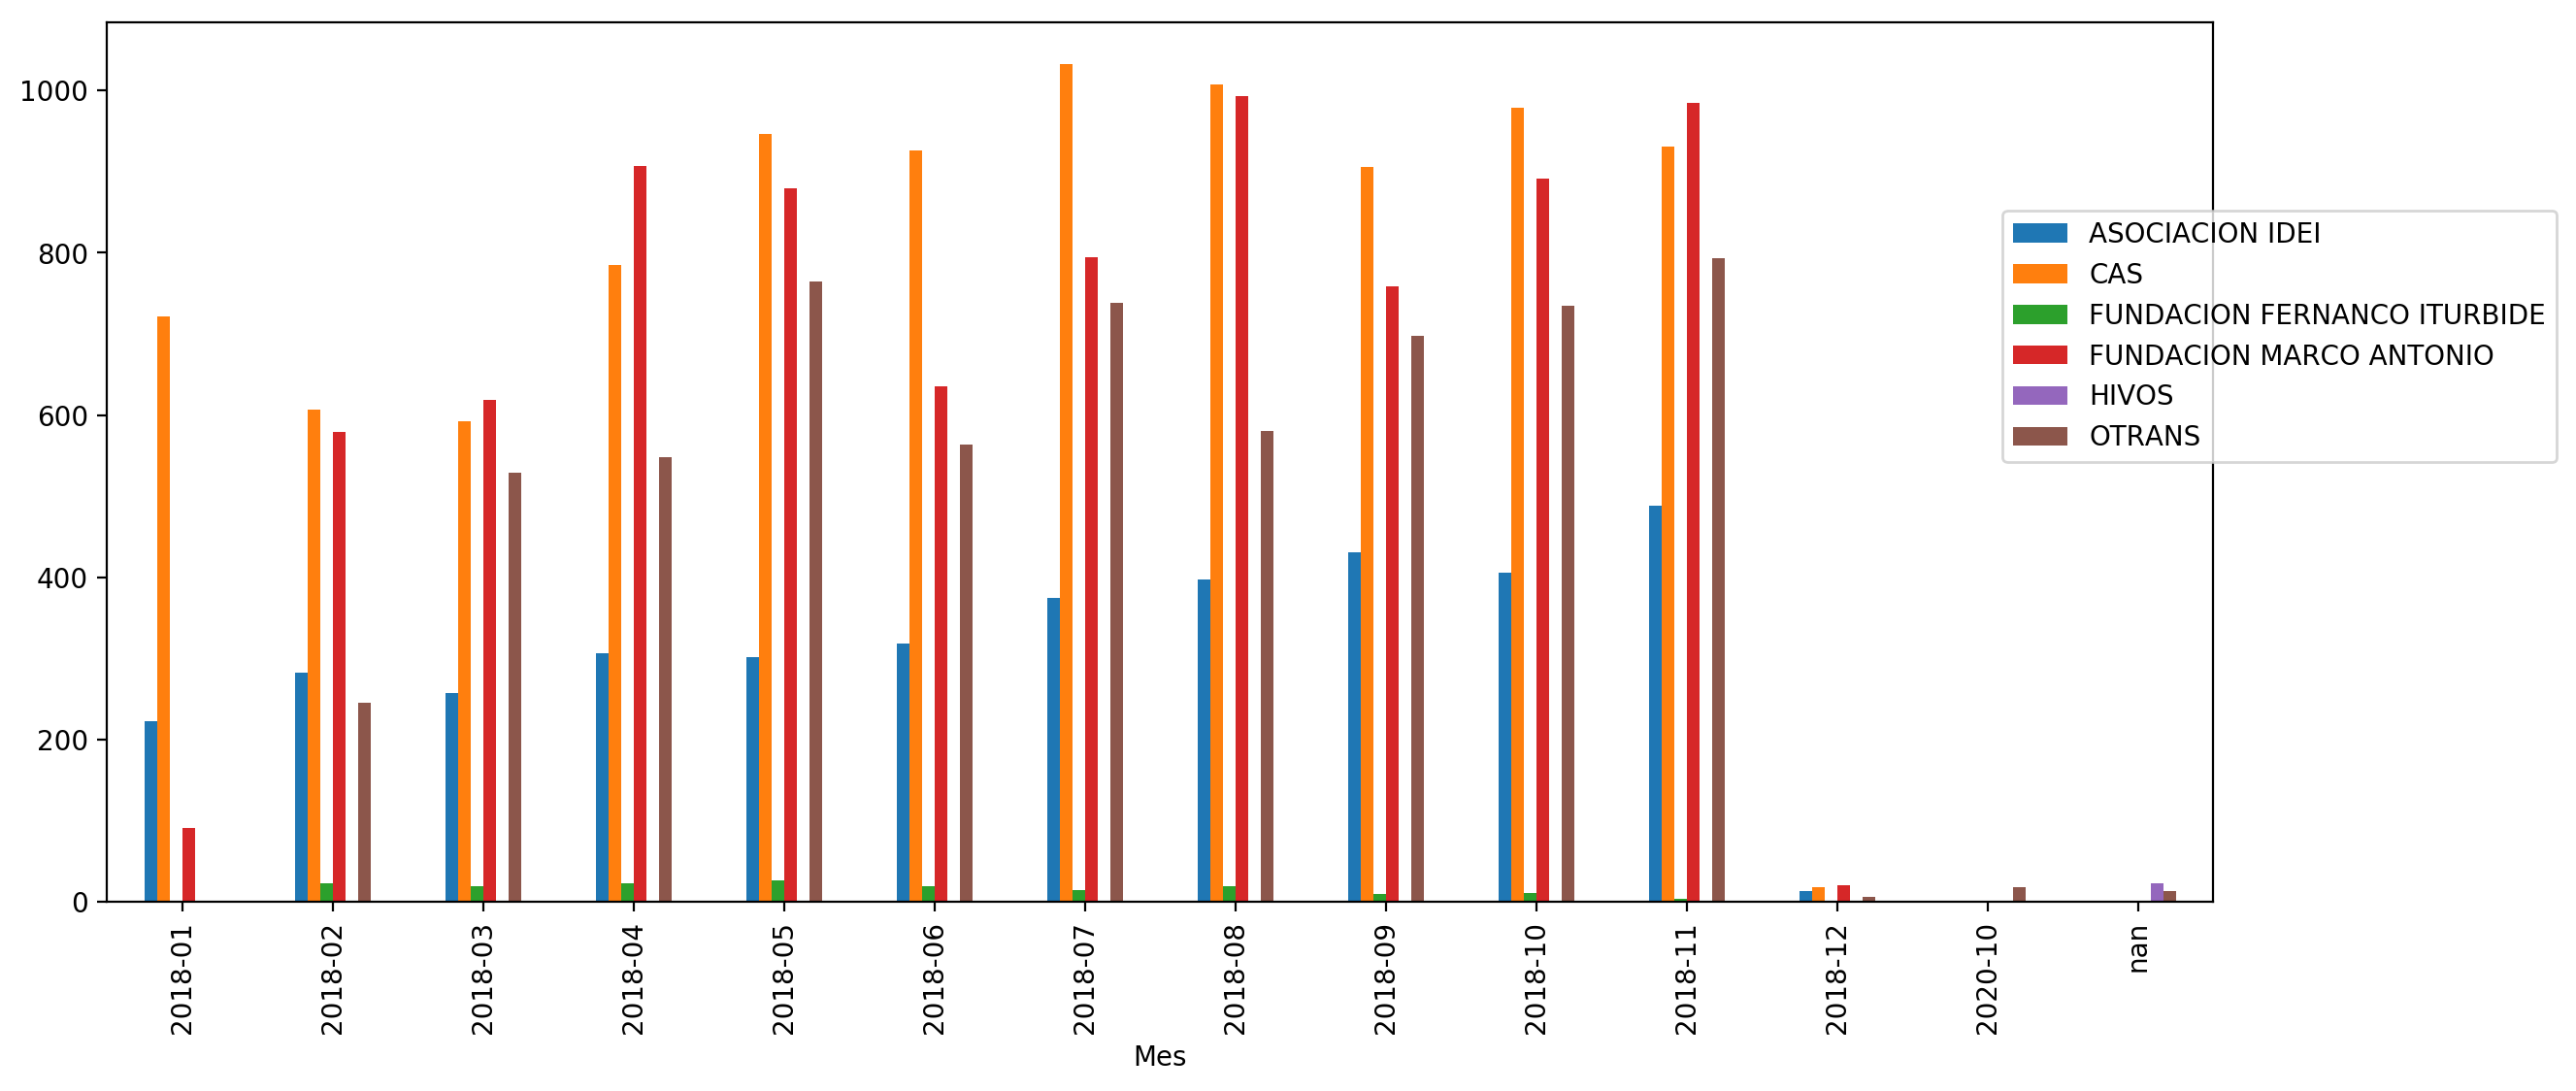

In [8]:
plt.rcParams["figure.figsize"] = (14,6)
temp = pb_tvc[pb_tvc.Mes != "NaT"].groupby(["Ejecutores", "Mes"]).numeroInforme.count()
temp.unstack(0).plot.bar()
plt.legend(loc=(0.9,0.5))

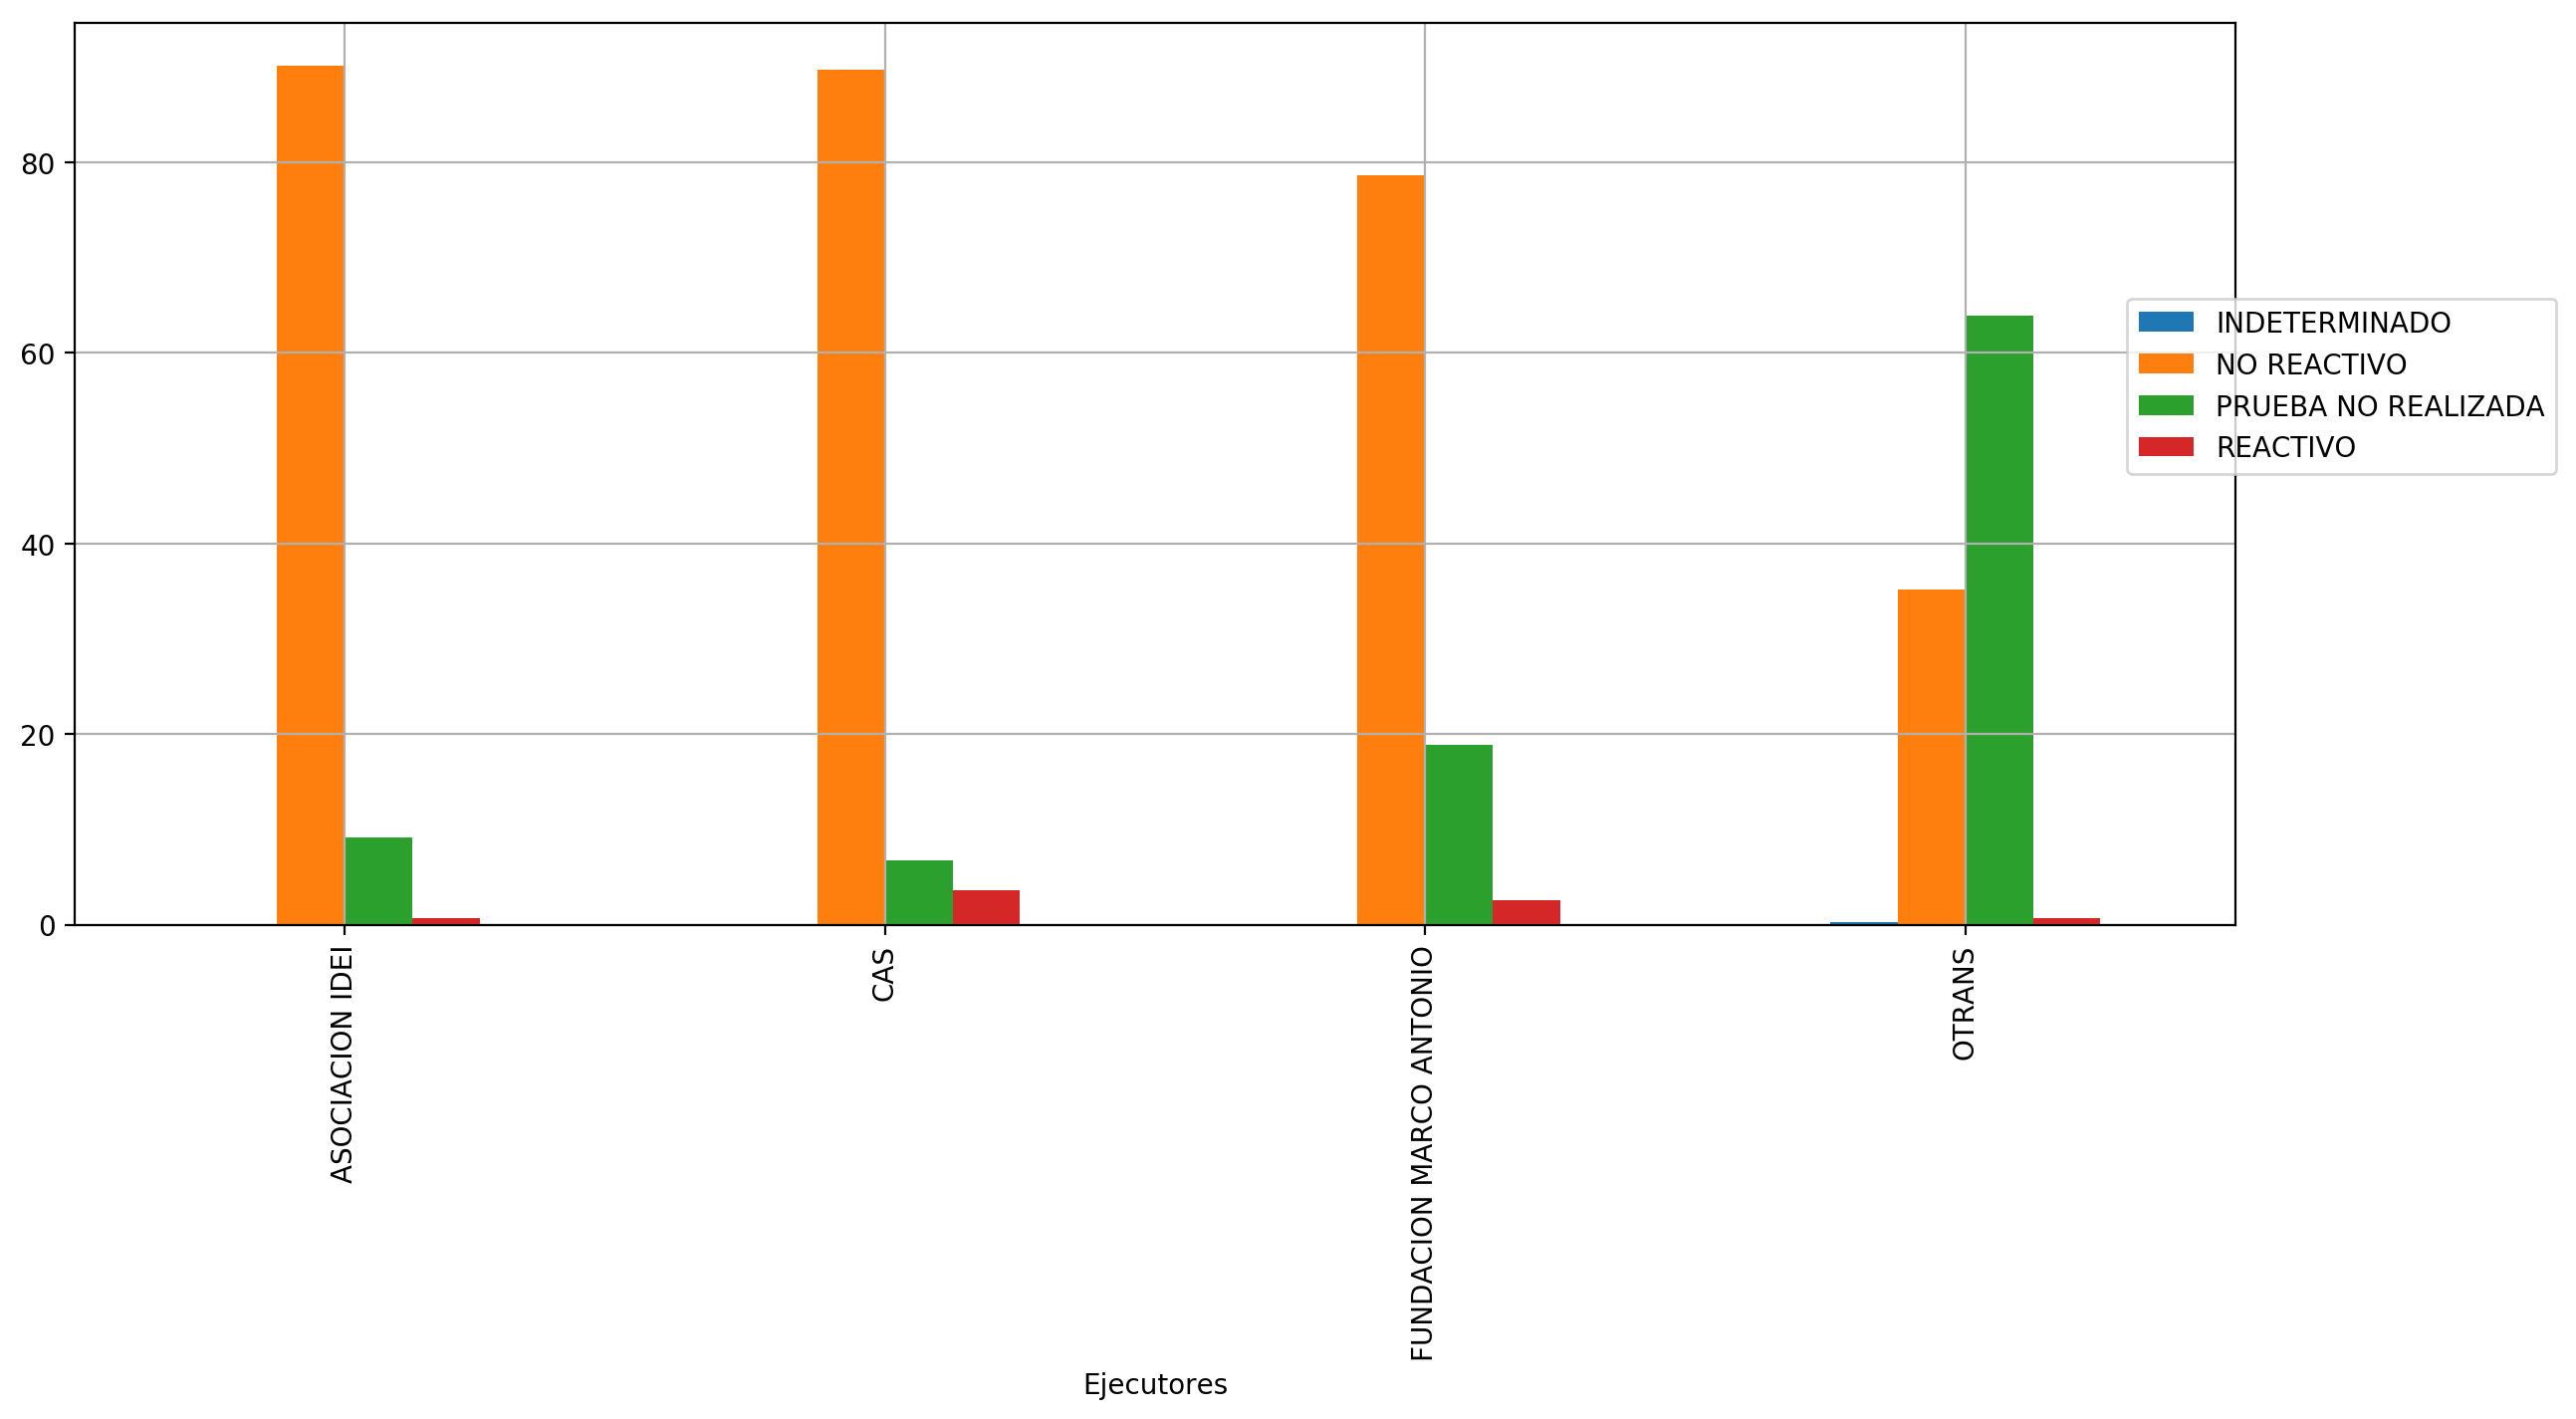

In [8]:
plt.rcParams["figure.figsize"] = (14,6)
temp = pb_tvc[(pb_tvc.Mes != "NaT") & (pb_tvc.Ejecutores.isin(["FUNDACION FERNANCO ITURBIDE", "HIVOS"])==False)]\
        .groupby(["Ejecutores", "resultadoVIH"]).numeroInforme\
        .count().unstack(1).fillna(0)
temp["total"] = temp.sum(axis=1)
temp2 = temp.divide(temp.total, axis = 0)*100
temp2[temp2.columns.tolist()[0:-1]].plot.bar()
plt.legend(loc=(0.95,0.5))
plt.grid()

In [17]:
plt.rcParams["figure.figsize"] = (5,10)
temp = pb_tvc[(pb_tvc.Mes != "NaT") ]\
        .groupby(["grupo", "resultadoVIH"]).apply(lambda x: len(x["codigounico"].unique())).unstack(1).fillna(0)
temp["total"] = temp.sum(axis=1)
temp2 = temp.divide(temp.total, axis = 0)*100
print(temp)
print("\n\n", temp2)
print("\n\nREACTIVIDAD:")
print( 100* temp["REACTIVO"] / (temp["NO REACTIVO"] + temp["REACTIVO"]))

resultadoVIH  INDETERMINADO  NO REACTIVO  PRUEBA NO REALIZADA  REACTIVO    total
grupo                                                                           
HSH                     0.0      13854.0               1732.0     541.0  16127.0
PV                      0.0        158.0                  0.0       0.0    158.0
TRANS                  14.0       3152.0               3372.0      77.0   6615.0


 resultadoVIH  INDETERMINADO  NO REACTIVO  PRUEBA NO REALIZADA  REACTIVO  total
grupo                                                                         
HSH                 0.00000    85.905624            10.739753  3.354623  100.0
PV                  0.00000   100.000000             0.000000  0.000000  100.0
TRANS               0.21164    47.649282            50.975057  1.164021  100.0


REACTIVIDAD:
grupo
HSH      3.758249
PV       0.000000
TRANS    2.384639
dtype: float64


In [10]:
# not a good idea to merge
# merged = pb_tvc.merge(its, on = "codigounico", suffixes = ("", "_its"), how = "outer")\
#        .merge(vinculacion, on = "codigounico", suffixes = ("", "_vinc"), how = "outer")


In [10]:
def process(data):
    return pd.Series(data = [
        len(data), 
        (data.numeroInforme_its.isna()==False).sum(),
        (data.resultadoVIH == "REACTIVO").sum(),
        (data.numeroInforme_vinc.isna()==False).sum()
    ], index=["PB/TVC", "ITS", "VIH Reactivo", "Vinculación"])
temp = merged[merged.subgrupo.apply(lambda x: x.startswith("PV ")==False if type(x) == str else True)]\
        .groupby("subgrupo").apply(process).fillna(0)
#temp["total"] = temp.sum(axis=1)
temp2 = temp.divide(temp["PB/TVC"], axis = 0) * 100
#temp.loc["total"] = temp.sum(axis=0)
print(temp2.round(2))
temp.loc["total"] = temp.sum(axis=0)
print("\n\n")
print(temp.divide(temp.loc["total"], axis = 1).round(4)*100)
print("\n\n")
temp3 = temp[["PB/TVC", "VIH Reactivo", "Vinculación"]].copy()
temp3["VIH Reactivo"] = temp3["VIH Reactivo"]/temp3["PB/TVC"]
temp3["Vinculación"] = temp3["Vinculación"]/temp3["PB/TVC"]/temp3["VIH Reactivo"]

temp3.round(3).fillna(0)*100
    #print(temp.divide(temp.loc["total"], axis = 1).round(4)*100)

                              PB/TVC    ITS  VIH Reactivo  Vinculación
subgrupo                                                              
HSH ADOLESCENTES Y JOVENES     100.0  53.75          6.25         3.75
HSH MAYORES DE 18 AÃ‘OS        100.0  43.56          3.03         2.03
TRANS ADOLESCENTES Y JOVENES   100.0   0.00          0.00         0.00
TRANS DE DIFERENTES PUEBLOS    100.0   9.89          7.14         4.95
TRANS MAYORES DE 18 AÃ‘OS      100.0   9.78          1.52         0.91
TRANS MIGRANTES                100.0   0.00          0.00         0.00
TRANS TRABAJADORAS SEXUALES    100.0   8.70          0.00         0.00



                              PB/TVC     ITS  VIH Reactivo  Vinculación
subgrupo                                                               
HSH ADOLESCENTES Y JOVENES      0.57    0.86          1.29         1.17
HSH MAYORES DE 18 AÃ‘OS        74.71   92.29         82.47        83.59
TRANS ADOLESCENTES Y JOVENES    0.02    0.00          0.00         0.0

,PB/TVC,VIH Reactivo,Vinculación
subgrupo,,,
HSH ADOLESCENTES Y JOVENES,8000,6.2,60.0
HSH MAYORES DE 18 AÃ‘OS,1055200,3.0,66.9
TRANS ADOLESCENTES Y JOVENES,300,0.0,0.0
TRANS DE DIFERENTES PUEBLOS,18200,7.1,69.2
TRANS MAYORES DE 18 AÃ‘OS,328300,1.5,60.0
TRANS MIGRANTES,100,0.0,0.0
TRANS TRABAJADORAS SEXUALES,2300,0.0,0.0
total,1412400,2.7,66.0


In [15]:
merged.groupby(["Ejecutores", "subgrupo"]).apply(process).fillna(0).reset_index()

,Ejecutores,subgrupo,PB/TVC,ITS,VIH Reactivo,Vinculación
0,ASOCIACION IDEI,HSH ADOLESCENTES Y JOVENES,4,0,0,0
1,ASOCIACION IDEI,HSH MAYORES DE 18 AÃ‘OS,1481,354,14,11
2,ASOCIACION IDEI,TRANS MAYORES DE 18 AÃ‘OS,357,65,4,0
3,ASOCIACION IDEI,TRANS TRABAJADORAS SEXUALES,3,0,0,0
4,CAS,HSH ADOLESCENTES Y JOVENES,76,43,5,3
5,CAS,HSH MAYORES DE 18 AÃ‘OS,5360,3774,202,136
6,FUNDACION FERNANCO ITURBIDE,PV ABORDADA EN OTROS LUGARES,112,0,0,0
7,FUNDACION FERNANCO ITURBIDE,PV ABORDADA EN UAI,1,0,0,0
8,FUNDACION MARCO ANTONIO,HSH MAYORES DE 18 AÃ‘OS,3710,468,104,67
9,FUNDACION MARCO ANTONIO,TRANS DE DIFERENTES PUEBLOS,181,18,13,9


In [6]:
pb_tvc.groupby(["codigounico", "grupo", "Ejecutores"]).codigounico.count().rename("value")\
.reset_index().groupby(["grupo", "Ejecutores"]).value.value_counts()\
.unstack(1,fill_value=0)

Ejecutores   ASOCIACION IDEI   CAS  FUNDACION FERNANCO ITURBIDE  \
grupo value                                                       
HSH   1                 1292  3356                            0   
      2                   47   479                            0   
      3                    4    49                            0   
      4                    1    15                            0   
      5                    0     3                            0   
      7                    0     0                            0   
      17                   0     0                            0   
      86                   0     1                            0   
PV    1                    0     0                          103   
      2                    0     0                            5   
TRANS 1                  337     0                            0   
      2                    3     0                            0   
      3                    1     0                            0   
      4                    0     0                            0   
      5                    1     0                            0   
      6                    0     0                            0   
      7                    0     0                            0   

Ejecutores   FUNDACION MARCO ANTONIO  HIVOS  OTRANS  
grupo value                                          
HSH   1                         3051      1       0  
      2                          230      0       0  
      3                           20      0       0  
      4                            5      0       0  
      5                            1      0       0  
      7                            1      0       0  
      17                           1      0       0  
      86                           0      0       0  
PV    1                            0      0       0  
      2                            0      0       0  
TRANS 1                          237     22    2123  
      2                           32      0     151  
      3                           12      0      46  
      4                            5      0      14  
      5                            1      0       5  
      6                            0      0       5  
      7                            0      0       1

In [41]:
its.groupby(["codigounico", "subgrupo", "Ejecutores"]).codigounico.count().rename("value")\
.reset_index().groupby(["subgrupo", "Ejecutores"]).value.value_counts()\
.unstack(1,fill_value=0)

Ejecutores                          ASOCIACION IDEI   CAS  \
subgrupo                     value                          
HSH ADOLESCENTES Y JOVENES   1                    1    46   
                             2                    0     2   
HSH MAYORES DE 18 AÃ‘OS      1                  363  2473   
                             2                   38   314   
                             3                    8    32   
                             4                    3     3   
                             6                    1     0   
TRANS ADOLESCENTES Y JOVENES 1                    0     0   
TRANS DE DIFERENTES PUEBLOS  1                    0     0   
                             2                    0     0   
TRANS MAYORES DE 18 AÃ‘OS    1                   82     0   
                             2                    3     0   
                             3                    0     0   
                             6                    0     0   
TRANS TRABAJADORAS SEXUALES  1                    0     0   
                             2                    0     0   

Ejecutores                          FUNDACION MARCO ANTONIO  HIVOS  OTRANS  
subgrupo                     value                                          
HSH ADOLESCENTES Y JOVENES   1                            0      0       0  
                             2                            0      0       0  
HSH MAYORES DE 18 AÃ‘OS      1                          567      2       0  
                             2                           57      0       0  
                             3                            8      1       0  
                             4                            1      0       0  
                             6                            0      0       0  
TRANS ADOLESCENTES Y JOVENES 1                            0      0       2  
TRANS DE DIFERENTES PUEBLOS  1                           24      0       0  
                             2                            2      0       0  
TRANS MAYORES DE 18 AÃ‘OS    1                           37      0     205  
                             2                            0      0      13  
                             3                            0      0       4  
                             6                            0      0       1  
TRANS TRABAJADORAS SEXUALES  1                            0      0       9  
                             2                            0      0       1

In [7]:
def processGroup(df) : 
    if len(df)>1:
        return df.Mes2.sort_values().diff().value_counts(dropna=True)
x = pb_tvc.groupby(["codigounico", "grupo", "Ejecutores"]).apply(processGroup)#.value_counts(dropna=False)
#.codigounico.count().rename("value")\
#.reset_index().groupby(["grupo", "Ejecutores"]).value.value_counts()\
#.unstack(1,fill_value=0)

In [62]:
(x[x.isna()==False].unstack(3)[0]+1).reset_index().groupby("Ejecutores")[0].value_counts().unstack(0, fill_value=0)

,2.0,3.0,4.0,5.0,6.0,14.0,82.0
Ejecutores,,,,,,,
ASOCIACION IDEI,7,0,0,0,0,0,0
CAS,50,5,0,0,0,0,1
FUNDACION FERNANCO ITURBIDE,1,0,0,0,0,0,0
FUNDACION MARCO ANTONIO,30,3,0,1,0,1,0
OTRANS,67,12,4,1,1,0,0


In [56]:
pb_tvc.head()

,numeroInforme,codigoActividad,codigounico,codgrupo,codsubgrupo,refervih,prePruebaVIH,pruebaVIH,postPruebaVIH,conoceResultadoVIH,codResultadoVIH,conoceResultadoSif,codResultadoSif,condonesMasculinos,condonesFemeninos,condonesSabores,lubriSachet,lubriTubo,impresos,grupo,subgrupo,resultadoVIH,codejecutor,codanno,codmes,codigoTipoActividad,tipoActividad,resultadoSif,codDepMun,lugar,direccion,responsable,educador,unmovil,fechareal,departamento,municipio,tema,Ejecutores,Mes,Mes2
0,20180200003,140,F22078810501RACO00,4,16,N,N,N,N,N,1,N,1,48,0,0,48,0,0,PV,PV ABORDADA EN OTROS LUGARES,NO REACTIVO,NAC0405,2,2,10,VISITAS DOMICILIARES,NO REACTIVO,501,Casa de habitaciones PV,Casa de habitaciones PV,Estuardo Cabrera,Estuardo Cabrera,N,2018-02-21,Escuintla,Escuintla,VIH,FUNDACION FERNANCO ITURBIDE,2018-02,26
1,20180200003,141,M20027210501NARA00,4,16,N,N,N,N,N,1,N,1,48,0,0,48,0,0,PV,PV ABORDADA EN OTROS LUGARES,NO REACTIVO,NAC0405,2,2,10,VISITAS DOMICILIARES,NO REACTIVO,501,Casa de habitaciones PV,Casa de habitaciones PV,Estuardo Cabrera,Estuardo Cabrera,N,2018-02-22,Escuintla,Escuintla,VIH,FUNDACION FERNANCO ITURBIDE,2018-02,26
2,20180200003,2189,M10057610502CAMA00,4,16,N,N,N,N,N,1,N,1,48,0,0,48,0,0,PV,PV ABORDADA EN OTROS LUGARES,NO REACTIVO,NAC0405,2,2,10,VISITAS DOMICILIARES,NO REACTIVO,502,Casa de habitaciones PV,Casa de habitaciones PV,Estuardo Cabrera,Estuardo Cabrera,N,2018-02-28,Escuintla,Santa Lucia Cotzumalguapa,VIH,FUNDACION FERNANCO ITURBIDE,2018-02,26
3,20180200003,133,F26048011801ERGU00,4,16,N,N,N,N,N,1,N,1,48,0,0,48,0,0,PV,PV ABORDADA EN OTROS LUGARES,NO REACTIVO,NAC0405,2,2,10,VISITAS DOMICILIARES,NO REACTIVO,1801,Casa de habitaciones PV,Casa de habitaciones PV,Manuel Augusto Choc,Manuel Augusto Choc,N,2018-02-13,Izabal,Puerto Barrios,VIH,FUNDACION FERNANCO ITURBIDE,2018-02,26
4,20180200003,134,F16057511801JUBO00,4,16,N,N,N,N,N,1,N,1,48,0,0,48,0,0,PV,PV ABORDADA EN OTROS LUGARES,NO REACTIVO,NAC0405,2,2,10,VISITAS DOMICILIARES,NO REACTIVO,1801,Casa de habitaciones PV,Casa de habitaciones PV,Manuel Augusto Choc,Manuel Augusto Choc,N,2018-02-06,Izabal,Puerto Barrios,VIH,FUNDACION FERNANCO ITURBIDE,2018-02,26


# SIGPRO metas y reactividad

In [9]:
import xlrd
from IPython import display

In [11]:
react = xlrd.open_workbook("../../../../Outcome Measurement Data/HIV/SIGPRO/Reactividad 2.xlsx", 0)

In [12]:
sheet1 = react.sheet_by_index(0)
sheet2 = react.sheet_by_index(1)

In [13]:
output = "<table><tbody>"
for i in range(0,100):
    try:
        output += "<tr><th>"+str(i) + "</th><td>" + str.join("</td><td>", [str(x) for x in sheet1.row_values(i)]) + "</td></tr>"
    except: 
        pass
output += "</tbody></table>"

In [14]:
#display.HTML(output)
#sheet2.name

In [15]:
dfs = []
reacts = {}
for i in (8, 18, 30):
    title = sheet1.row_values(i)
    data = [sheet1.row_values(j) for j in range(i+1, i+5)]
    dfs.append(pd.DataFrame(data = {"Goal": [j[0].strip().replace("P ", "P. ") for j in data], 
                                    "Progress": [j[13] for j in data], 
                                    "Table": [title[0]]*4}))
reacts["CAS"] = (sheet1.row_values(14)[1], sheet1.row_values(14)[7])
reacts["FUNDAMACO"] = (sheet1.row_values(25)[1], sheet1.row_values(25)[8])
reacts["IDEI"] = (sheet1.row_values(36)[1], sheet1.row_values(14)[7])
data = pd.concat(dfs, 0)
data = data.replace({"Goal": {
    "Positivos": "HIV+",
    "P. basico": "Basic package",
    "P. extendido": "Extended package",
    "Vinculados": "Adhered"
}})

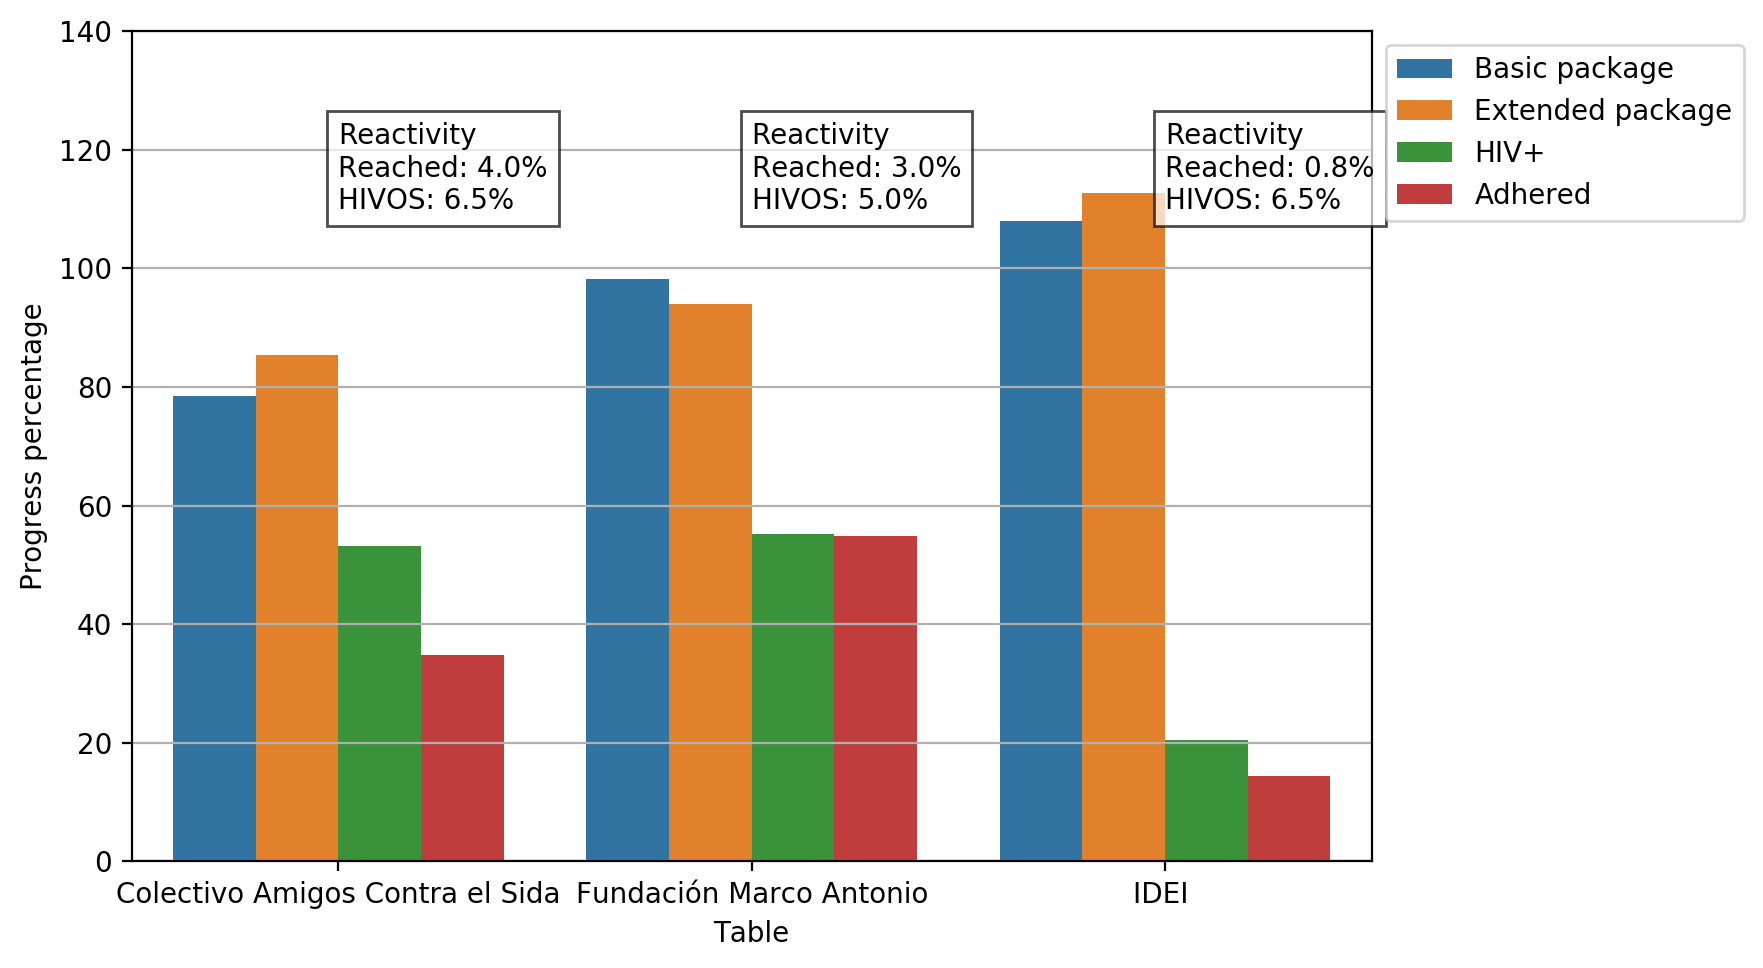

In [16]:
plt.rcParams["figure.figsize"] = (8,5.5)
plt.grid()
sb.barplot("Table", "Progress", "Goal", data)
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("Progress percentage")
#plt.title("Subreceptors Progress with MSM Population Goals \n(Jan - Sep 2018)", fontsize=15)
plt.ylim(0,140)
i = 0
for key, values in reacts.items():
    plt.text(i, 110, "Reactivity\nReached: "+str(np.round(100*values[0],1))+"%\nHIVOS: "+str(np.round(100*values[1],1))+ "%", 
            bbox=dict(facecolor='white', alpha=0.7), horizontalalignment='left')
    i+=1

In [42]:
dfs = []
reacts = {}
for i in (2, 12, 23):
    title = sheet2.row_values(i)
    data = [sheet2.row_values(j) for j in range(i+1, i+5)]
    dfs.append(pd.DataFrame(data = {"Goal": [str.strip(j[0]).replace("P ", "P. ") for j in data], 
                                    "Progress": [j[13] for j in data], 
                                    "Table": [title[0]]*4}))
reacts["OTRANS"] = (sheet2.row_values(8)[1], sheet2.row_values(8)[4], sheet2.row_values(8)[8])
reacts["FUNDAMACO"] = (sheet2.row_values(18)[1], sheet2.row_values(18)[4], sheet2.row_values(18)[7])
reacts["IDEI"] = (sheet2.row_values(29)[1], sheet2.row_values(29)[4], sheet2.row_values(29)[7])
data = pd.concat(dfs, 0)
data = data.replace({"Goal": {
    "Positivos": "HIV+",
    "P. basico": "Basic package",
    "P. extendido": "Extended package",
    "Vinculados": "Adhered"
}})

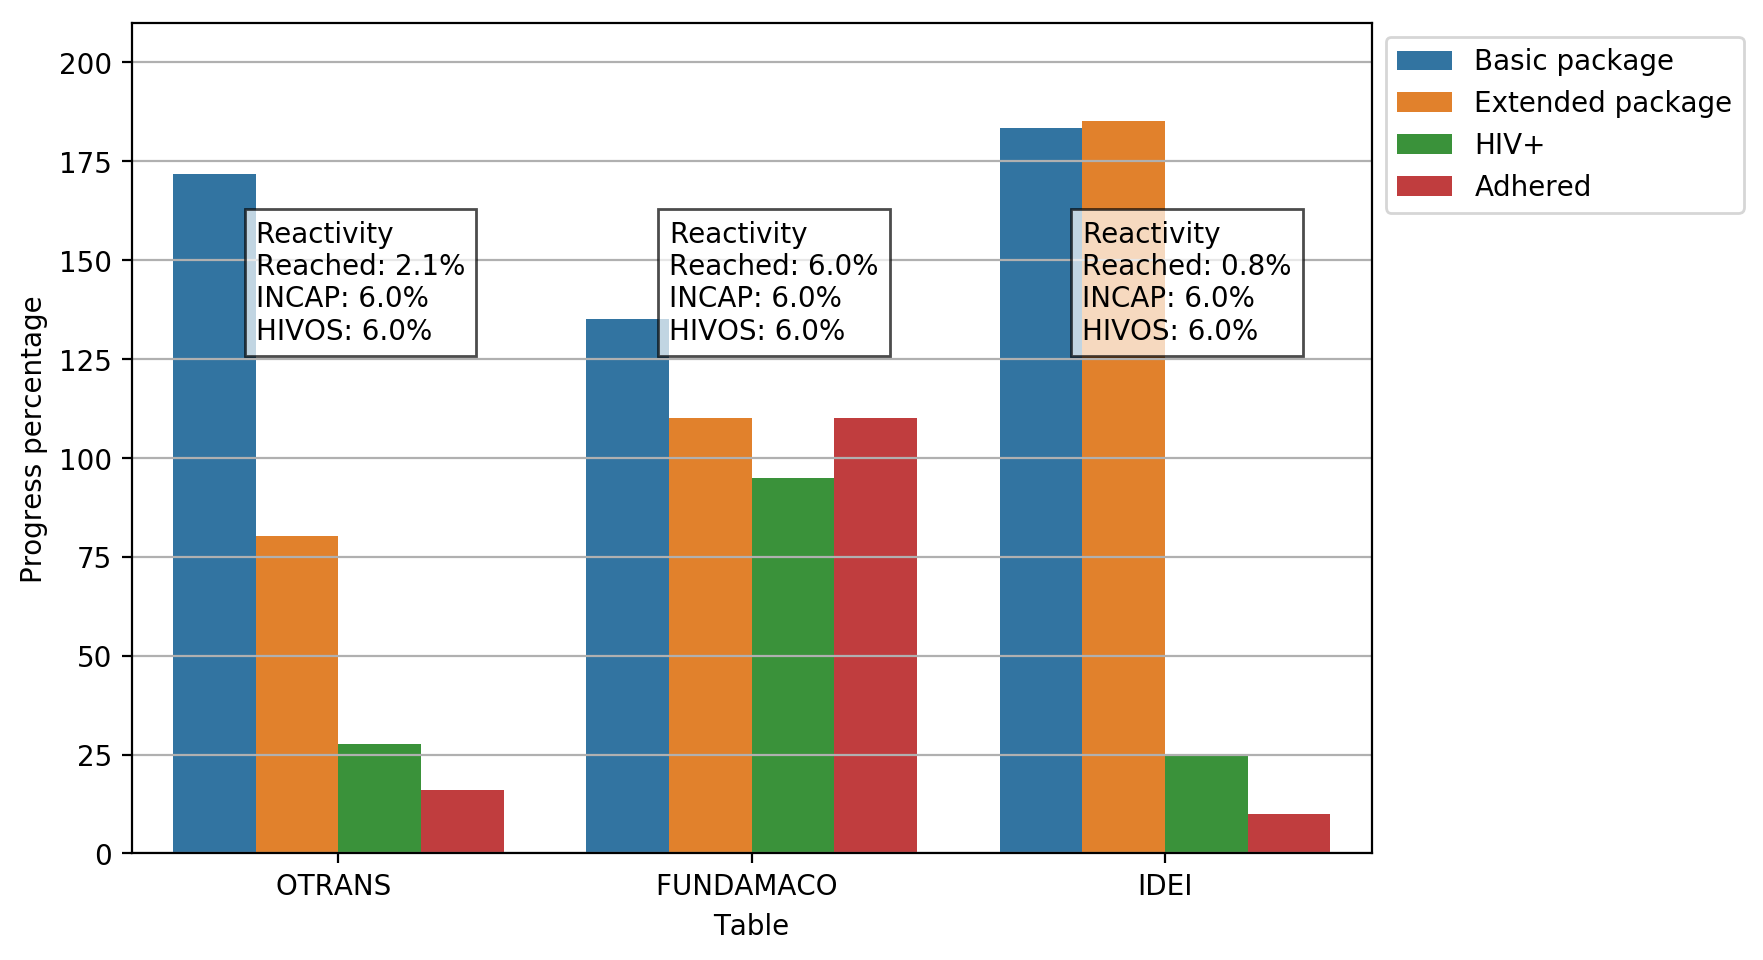

In [43]:
plt.rcParams["figure.figsize"] = (8,5.5)
plt.grid()
sb.barplot("Table", "Progress", "Goal", data)
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("Progress percentage")
#plt.title("Subreceptors Progress with Trans Population Goals \n(Jan - Sep 2018)", fontsize=15)
plt.ylim(0,210)
i = 0
for key, values in reacts.items():
    plt.text(i-0.2, 130, "Reactivity\nReached: "+str(np.round(100*values[0],1))+"%\nINCAP: "+str(np.round(100*values[1],1))+ "%\nHIVOS: "+str(np.round(100*values[2],1))+ "%", 
            bbox=dict(facecolor='white', alpha=0.7), horizontalalignment='left')
    i+=1

# Personas que recibieron paquete básico

In [11]:
pb_tvc.columns

Index(['Unnamed: 0', 'numeroInforme', 'codigoActividad', 'codigounico',
       'codgrupo', 'codsubgrupo', 'refervih', 'prePruebaVIH', 'pruebaVIH',
       'postPruebaVIH', 'conoceResultadoVIH', 'codResultadoVIH',
       'conoceResultadoSif', 'codResultadoSif', 'condonesMasculinos',
       'condonesFemeninos', 'condonesSabores', 'lubriSachet', 'lubriTubo',
       'impresos', 'grupo', 'subgrupo', 'resultadoVIH', 'codejecutor',
       'codanno', 'codmes', 'codigoTipoActividad', 'tipoActividad',
       'resultadoSif', 'codDepMun', 'lugar', 'direccion', 'responsable',
       'educador', 'unmovil', 'fechareal', 'departamento', 'municipio', 'tema',
       'pqBasico', 'Date', 'Gender', 'Age', 'municode', 'Ejecutores', 'Mes',
       'Mes2'],
      dtype='object')

In [10]:
len(pb_tvc.codigounico.unique()), len(pb_tvc)

(21783, 27840)

In [16]:
temp = pb_tvc[["codigounico", "Date", "Ejecutores"]].groupby("codigounico")\
    .apply(lambda x: x.iloc[0].Ejecutores).value_counts()
# first provider that appears
print(temp.sort_index())
temp = pb_tvc[["codigounico", "Ejecutores"]].groupby("Ejecutores")\
    .apply(lambda x: len(x["codigounico"].unique()))
# all unique by provider
print(temp.sort_index())

ASOCIACION IDEI                3327
CAS                            6856
FUNDACION FERNANCO ITURBIDE     158
FUNDACION MARCO ANTONIO        6670
HIVOS                            22
OTRANS                         4750
dtype: int64
Ejecutores
ASOCIACION IDEI                3338
CAS                            6979
FUNDACION FERNANCO ITURBIDE     158
FUNDACION MARCO ANTONIO        6767
HIVOS                            23
OTRANS                         4772
dtype: int64


In [34]:
pb_tvc.Date.map(lambda x: x[0:7] if type(x) == str else "0").value_counts().sort_index()

0            40
2018-01    1036
2018-02    1737
2018-03    2018
2018-04    2569
2018-05    2919
2018-06    2465
2018-07    2955
2018-08    2998
2018-09    2804
2018-10    3022
2018-11    3201
2018-12      58
2020-10      18
Name: Date, dtype: int64